In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/cryptocurrency/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../input/cryptocurrency/coin_Bitcoin.csv
../input/cryptocurrency/coin_Ethereum.csv


In [2]:
df = None
for dirname, _, filenames in os.walk('../input/cryptocurrency/'):
    for filename in filenames:
        
        if filename not in ["coin_Ethereum.csv",]: # isolating bitcoin only makes it more accurate 
            continue
    
        raw = pd.read_csv(os.path.join(dirname, filename))
        
        try:
            df = pd.concat([df, pd.DataFrame.from_records(raw)])
        except:
            df = raw
df

SNo      Name Symbol                 Date         High          Low  \
0        1  Ethereum    ETH  2015-08-08 23:59:59     2.798810     0.714725   
1        2  Ethereum    ETH  2015-08-09 23:59:59     0.879810     0.629191   
2        3  Ethereum    ETH  2015-08-10 23:59:59     0.729854     0.636546   
3        4  Ethereum    ETH  2015-08-11 23:59:59     1.131410     0.663235   
4        5  Ethereum    ETH  2015-08-12 23:59:59     1.289940     0.883608   
...    ...       ...    ...                  ...          ...          ...   
2155  2156  Ethereum    ETH  2021-07-02 23:59:59  2155.596496  2021.824808   
2156  2157  Ethereum    ETH  2021-07-03 23:59:59  2237.567155  2117.590013   
2157  2158  Ethereum    ETH  2021-07-04 23:59:59  2384.286857  2190.837703   
2158  2159  Ethereum    ETH  2021-07-05 23:59:59  2321.922836  2163.041394   
2159  2160  Ethereum    ETH  2021-07-06 23:59:59  2346.294874  2197.919385   

             Open        Close        Volume     Marketcap  
0        2.793760     0.753325  6.741880e+05  4.548689e+07  
1        0.706136     0.701897  5.321700e+05  4.239957e+07  
2        0.713989     0.708448  4.052830e+05  4.281836e+07  
3        0.708087     1.067860  1.463100e+06  6.456929e+07  
4        1.058750     1.217440  2.150620e+06  7.364501e+07  
...           ...          ...           ...           ...  
2155  2109.892677  2150.040364  3.179621e+10  2.505527e+11  
2156  2150.835025  2226.114282  1.743336e+10  2.594475e+11  
2157  2226.550382  2321.724112  1.878711e+10  2.706217e+11  
2158  2321.922836  2198.582464  2.010379e+10  2.562978e+11  
2159  2197.919385  2324.679449  2.089186e+10  2.710286e+11  

[2160 rows x 10 columns]

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df

SNo      Name Symbol                Date         High          Low  \
0        1  Ethereum    ETH 2015-08-08 23:59:59     2.798810     0.714725   
1        2  Ethereum    ETH 2015-08-09 23:59:59     0.879810     0.629191   
2        3  Ethereum    ETH 2015-08-10 23:59:59     0.729854     0.636546   
3        4  Ethereum    ETH 2015-08-11 23:59:59     1.131410     0.663235   
4        5  Ethereum    ETH 2015-08-12 23:59:59     1.289940     0.883608   
...    ...       ...    ...                 ...          ...          ...   
2155  2156  Ethereum    ETH 2021-07-02 23:59:59  2155.596496  2021.824808   
2156  2157  Ethereum    ETH 2021-07-03 23:59:59  2237.567155  2117.590013   
2157  2158  Ethereum    ETH 2021-07-04 23:59:59  2384.286857  2190.837703   
2158  2159  Ethereum    ETH 2021-07-05 23:59:59  2321.922836  2163.041394   
2159  2160  Ethereum    ETH 2021-07-06 23:59:59  2346.294874  2197.919385   

             Open        Close        Volume     Marketcap  
0        2.793760     0.753325  6.741880e+05  4.548689e+07  
1        0.706136     0.701897  5.321700e+05  4.239957e+07  
2        0.713989     0.708448  4.052830e+05  4.281836e+07  
3        0.708087     1.067860  1.463100e+06  6.456929e+07  
4        1.058750     1.217440  2.150620e+06  7.364501e+07  
...           ...          ...           ...           ...  
2155  2109.892677  2150.040364  3.179621e+10  2.505527e+11  
2156  2150.835025  2226.114282  1.743336e+10  2.594475e+11  
2157  2226.550382  2321.724112  1.878711e+10  2.706217e+11  
2158  2321.922836  2198.582464  2.010379e+10  2.562978e+11  
2159  2197.919385  2324.679449  2.089186e+10  2.710286e+11  

[2160 rows x 10 columns]

In [4]:
# clean the data, drop the nonsensical headers
df["Increase"] = df["Close"] > df["Open"]
df["Increase"] = df["Increase"].astype(int)
print(df["Increase"])

df["Change"] =  ( df["Close"] - df["Open"] ) / df["Open"]
print(df)

0       0
1       0
2       0
3       1
4       1
       ..
2155    1
2156    1
2157    1
2158    0
2159    1
Name: Increase, Length: 2160, dtype: int32
       SNo      Name Symbol                Date         High          Low  \
0        1  Ethereum    ETH 2015-08-08 23:59:59     2.798810     0.714725   
1        2  Ethereum    ETH 2015-08-09 23:59:59     0.879810     0.629191   
2        3  Ethereum    ETH 2015-08-10 23:59:59     0.729854     0.636546   
3        4  Ethereum    ETH 2015-08-11 23:59:59     1.131410     0.663235   
4        5  Ethereum    ETH 2015-08-12 23:59:59     1.289940     0.883608   
...    ...       ...    ...                 ...          ...          ...   
2155  2156  Ethereum    ETH 2021-07-02 23:59:59  2155.596496  2021.824808   
2156  2157  Ethereum    ETH 2021-07-03 23:59:59  2237.567155  2117.590013   
2157  2158  Ethereum    ETH 2021-07-04 23:59:59  2384.286857  2190.837703   
2158  2159  Ethereum    ETH 2021-07-05 23:59:59  2321.922836  2163.041394   


In [5]:
train_data = df.drop(labels=["SNo", "Name", "Symbol", "Date"], axis=1)
train_data

High          Low         Open        Close        Volume  \
0        2.798810     0.714725     2.793760     0.753325  6.741880e+05   
1        0.879810     0.629191     0.706136     0.701897  5.321700e+05   
2        0.729854     0.636546     0.713989     0.708448  4.052830e+05   
3        1.131410     0.663235     0.708087     1.067860  1.463100e+06   
4        1.289940     0.883608     1.058750     1.217440  2.150620e+06   
...           ...          ...          ...          ...           ...   
2155  2155.596496  2021.824808  2109.892677  2150.040364  3.179621e+10   
2156  2237.567155  2117.590013  2150.835025  2226.114282  1.743336e+10   
2157  2384.286857  2190.837703  2226.550382  2321.724112  1.878711e+10   
2158  2321.922836  2163.041394  2321.922836  2198.582464  2.010379e+10   
2159  2346.294874  2197.919385  2197.919385  2324.679449  2.089186e+10   

         Marketcap  Increase    Change  
0     4.548689e+07         0 -0.730354  
1     4.239957e+07         0 -0.006003  
2     4.281836e+07         0 -0.007761  
3     6.456929e+07         1  0.508091  
4     7.364501e+07         1  0.149884  
...            ...       ...       ...  
2155  2.505527e+11         1  0.019028  
2156  2.594475e+11         1  0.035000  
2157  2.706217e+11         1  0.042745  
2158  2.562978e+11         0 -0.053120  
2159  2.710286e+11         1  0.057673  

[2160 rows x 8 columns]

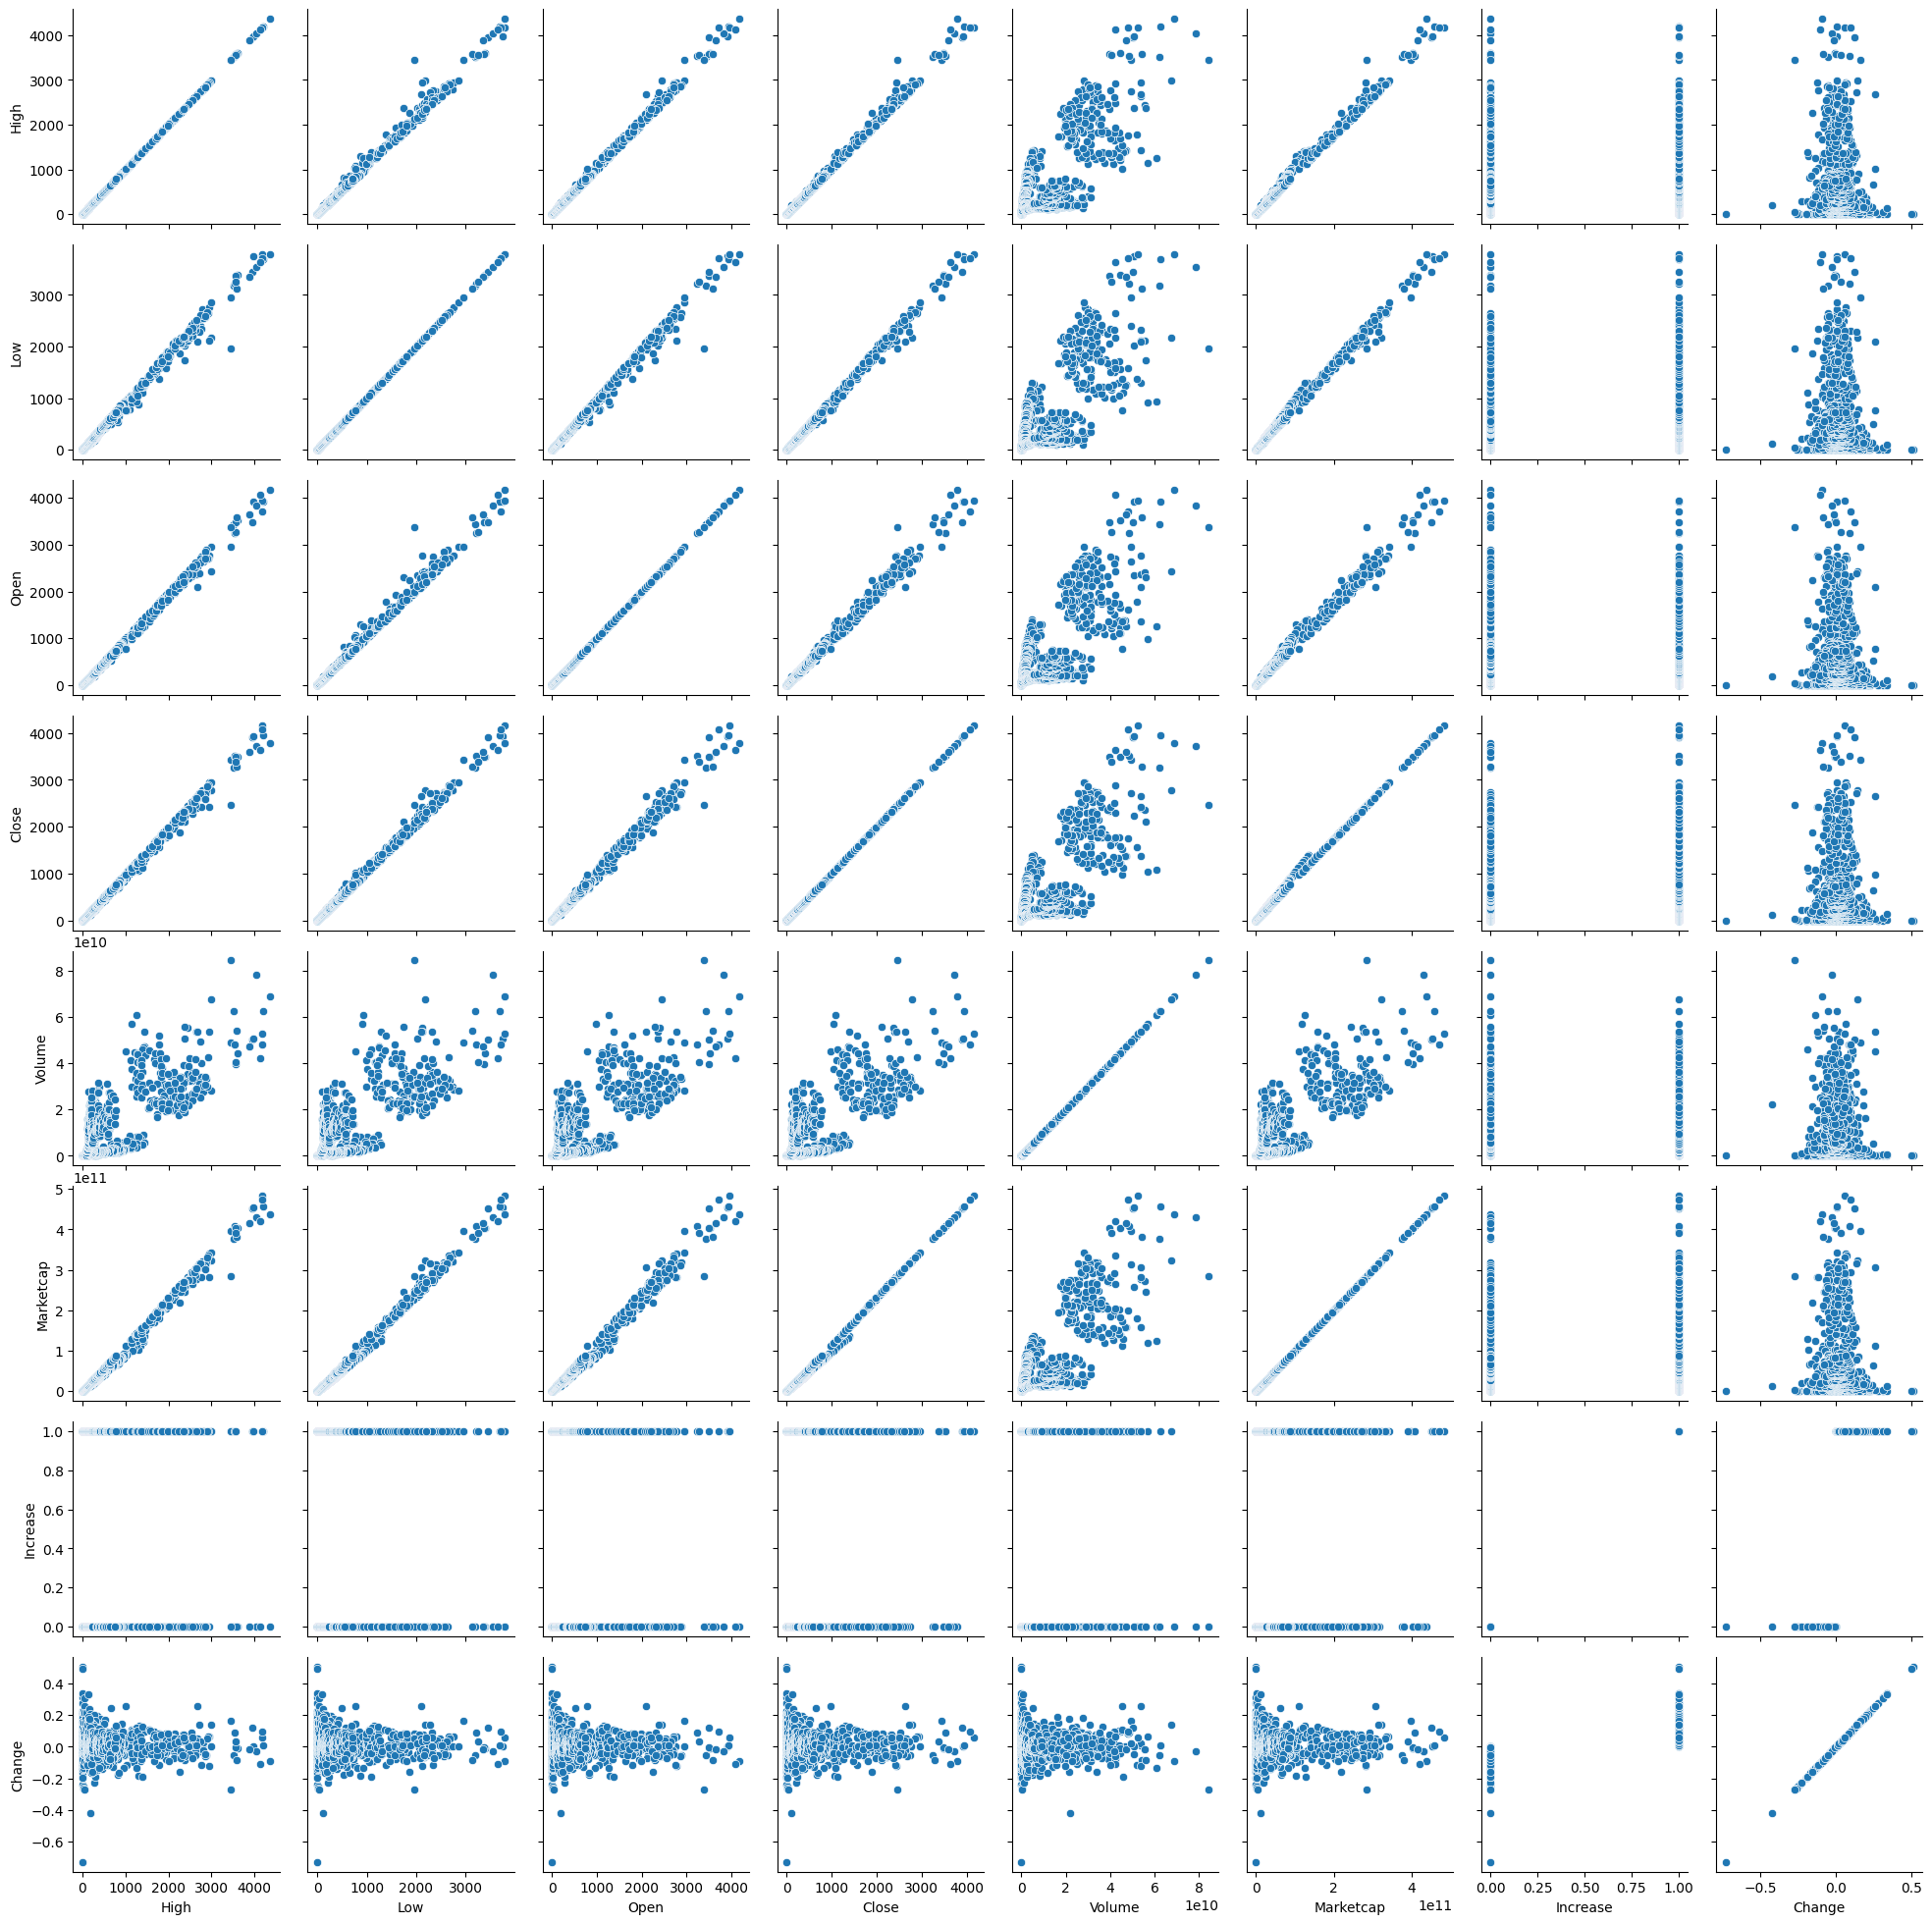

In [7]:
import seaborn as sns

g = sns.PairGrid(train_data)
g.map(sns.scatterplot)

(array([4.65137805e+03, 5.08158005e+03, 2.23696751e+03, 7.64057684e+03,
       1.04899131e+11, 9.16906362e+11, 1.23281064e+00]), array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.26686113]))


<AxesSubplot:>

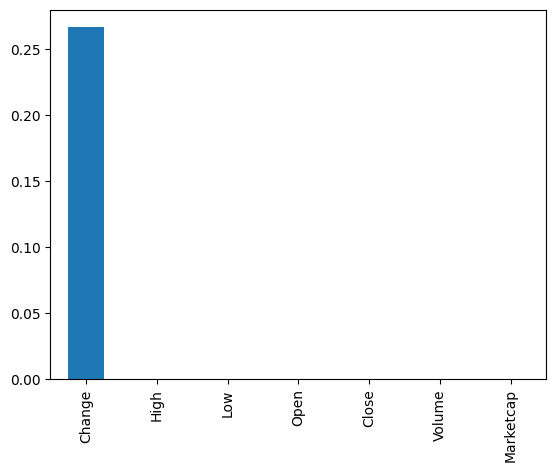

In [8]:
# here use chi2 if features were acceptable
from sklearn.feature_selection import chi2

_train_labels = train_data["Increase"]
_train_data = train_data.drop(labels=["Increase"], axis=1)
_train_data["Change"] = abs(_train_data["Change"]) # 


chi_scores = chi2(_train_data, _train_labels)
print(chi_scores)
p_values = pd.Series(chi_scores[1], index=_train_data.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()


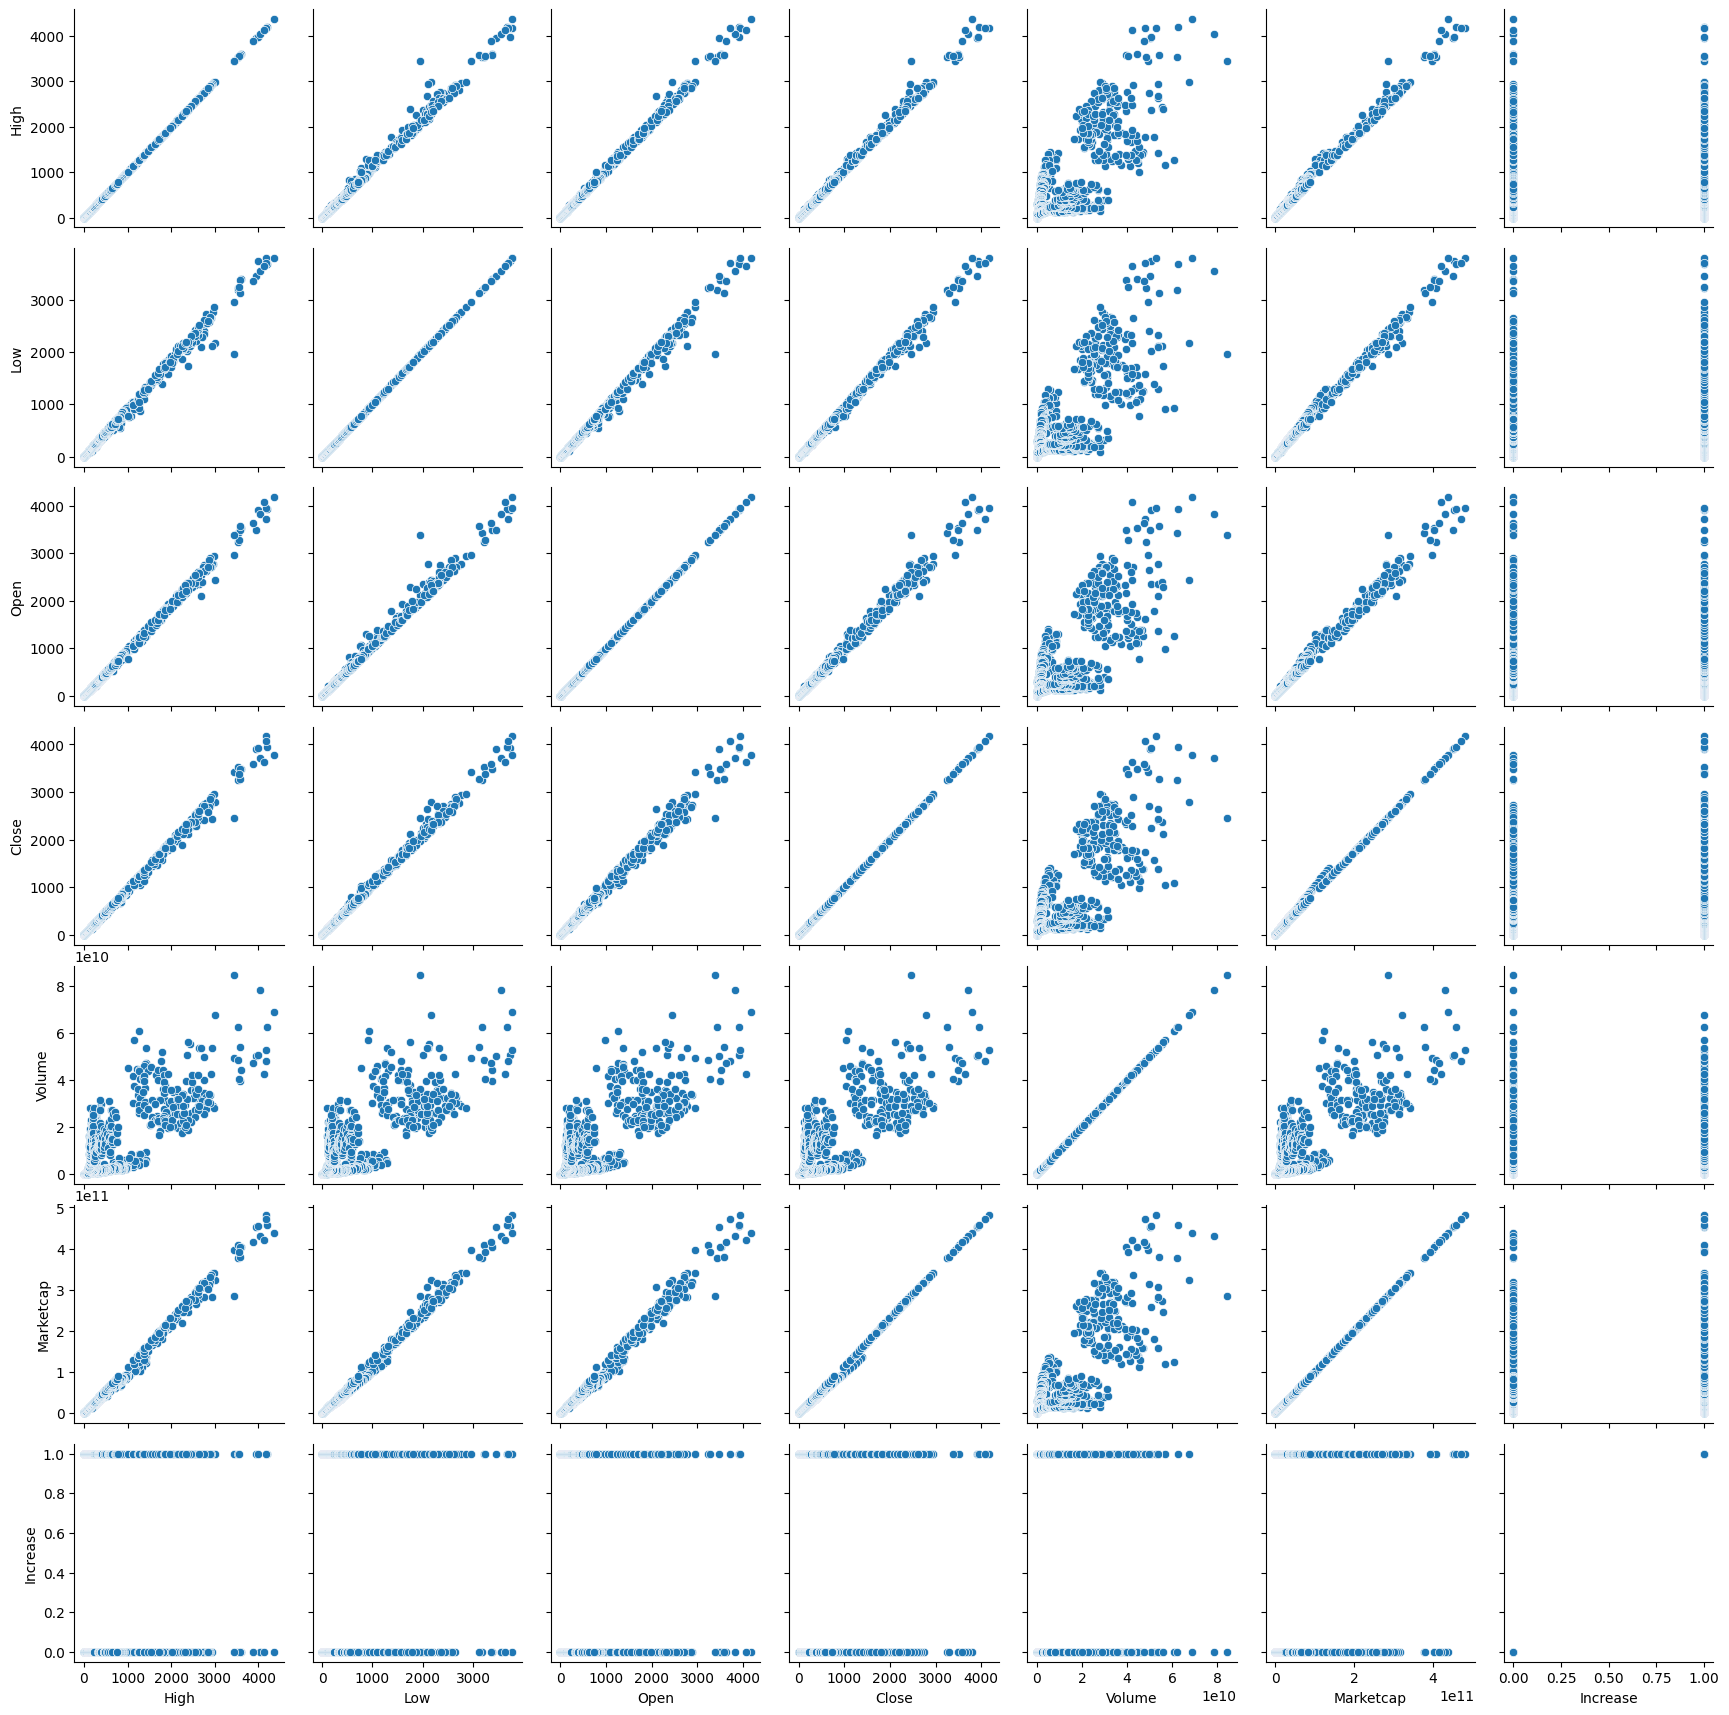

In [9]:
train_data 
train_data = train_data.drop(labels=["Change"], axis=1)
train_data


import seaborn as sns

g = sns.PairGrid(train_data)
g.map(sns.scatterplot)


In [10]:
train_data["Date"] = df["Date"]
train_data

High          Low         Open        Close        Volume  \
0        2.798810     0.714725     2.793760     0.753325  6.741880e+05   
1        0.879810     0.629191     0.706136     0.701897  5.321700e+05   
2        0.729854     0.636546     0.713989     0.708448  4.052830e+05   
3        1.131410     0.663235     0.708087     1.067860  1.463100e+06   
4        1.289940     0.883608     1.058750     1.217440  2.150620e+06   
...           ...          ...          ...          ...           ...   
2155  2155.596496  2021.824808  2109.892677  2150.040364  3.179621e+10   
2156  2237.567155  2117.590013  2150.835025  2226.114282  1.743336e+10   
2157  2384.286857  2190.837703  2226.550382  2321.724112  1.878711e+10   
2158  2321.922836  2163.041394  2321.922836  2198.582464  2.010379e+10   
2159  2346.294874  2197.919385  2197.919385  2324.679449  2.089186e+10   

         Marketcap  Increase                Date  
0     4.548689e+07         0 2015-08-08 23:59:59  
1     4.239957e+07         0 2015-08-09 23:59:59  
2     4.281836e+07         0 2015-08-10 23:59:59  
3     6.456929e+07         1 2015-08-11 23:59:59  
4     7.364501e+07         1 2015-08-12 23:59:59  
...            ...       ...                 ...  
2155  2.505527e+11         1 2021-07-02 23:59:59  
2156  2.594475e+11         1 2021-07-03 23:59:59  
2157  2.706217e+11         1 2021-07-04 23:59:59  
2158  2.562978e+11         0 2021-07-05 23:59:59  
2159  2.710286e+11         1 2021-07-06 23:59:59  

[2160 rows x 8 columns]

In [11]:
# lazy, it should be a datetime frs it was a string just filter out those 2021
test_data = train_data[train_data["Date"].dt.year >= 2021]
X = train_data[train_data["Date"].dt.year < 2021]

X = X.sort_values(by="Date")
test_data = test_data.sort_values(by="Date")

print(X)
print(test_data)

            High         Low        Open       Close        Volume  \
0       2.798810    0.714725    2.793760    0.753325  6.741880e+05   
1       0.879810    0.629191    0.706136    0.701897  5.321700e+05   
2       0.729854    0.636546    0.713989    0.708448  4.052830e+05   
3       1.131410    0.663235    0.708087    1.067860  1.463100e+06   
4       1.289940    0.883608    1.058750    1.217440  2.150620e+06   
...          ...         ...         ...         ...           ...   
1968  711.393555  628.334951  635.887158  682.642359  2.609355e+10   
1969  745.877766  683.205815  683.205815  730.397365  2.422257e+10   
1970  737.952903  692.149438  730.358684  731.520119  1.871068e+10   
1971  754.303234  720.988875  731.472845  751.618972  1.729457e+10   
1972  754.299440  726.511908  751.626643  737.803398  1.392685e+10   

         Marketcap  Increase                Date  
0     4.548689e+07         0 2015-08-08 23:59:59  
1     4.239957e+07         0 2015-08-09 23:59:59  
2     

In [12]:
X_y = X["Marketcap"]

X = X.drop(labels=["Increase","Date", "Marketcap",], axis=1)

test_y = test_data["Marketcap"]
test_data = test_data.drop(labels=["Increase", "Date", "Marketcap",], axis=1)

X_y

0       4.548689e+07
1       4.239957e+07
2       4.281836e+07
3       6.456929e+07
4       7.364501e+07
            ...     
1968    7.782807e+10
1969    8.328260e+10
1970    8.342033e+10
1971    8.572258e+10
1972    8.415681e+10
Name: Marketcap, Length: 1973, dtype: float64

In [13]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

LR.fit(X, X_y)

LinearRegression()

In [14]:
LR.score(test_data, test_y)

0.8586877835076374

In [15]:
from sklearn.metrics import mean_absolute_error
ypred = LR.predict(test_data)
mean_absolute_error(test_y, ypred)

27226788699.62781

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


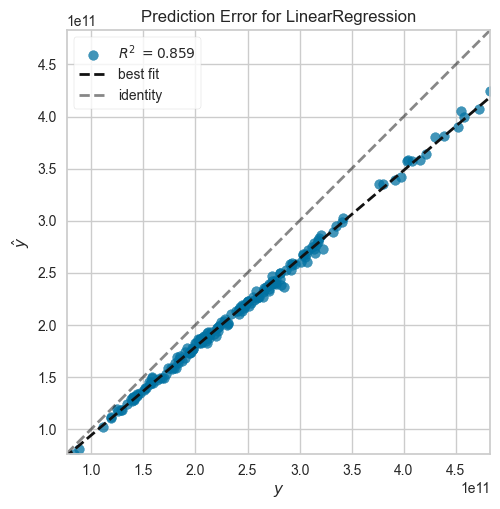

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [16]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(LR)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


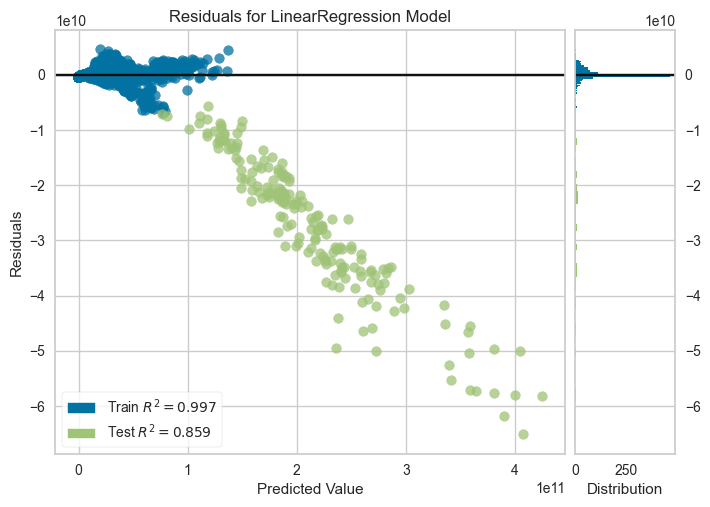

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [17]:
visualizer = ResidualsPlot(LR)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [66]:
# from sklearn.metrics import ConfusionMatrixDisplay

# def confusion_mtx(model, Y, predict):
#     disp = ConfusionMatrixDisplay.from_predictions(
#         Y,
#         predict,
#     )
#     plt.show()
# # does not work, I believe due to the labels not really discrete. Works on classifier mostly with 2 labels only unlike marketcap prediction
# confusion_mtx(LR, test_y, LR.predict(test_data))

In [18]:
from sklearn.linear_model import Lasso
Ls=Lasso()
Ls.fit(X, X_y)
ypred=Ls.predict(test_data)
Ls.score(test_data, test_y)

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.762e+21, tolerance: 1.072e+20
  model = cd_fast.enet_coordinate_descent(


0.8569964942005036

In [19]:
from sklearn.metrics import mean_absolute_error
ypred = Ls.predict(test_data)
mean_absolute_error(test_y, ypred)

27436901881.143875

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


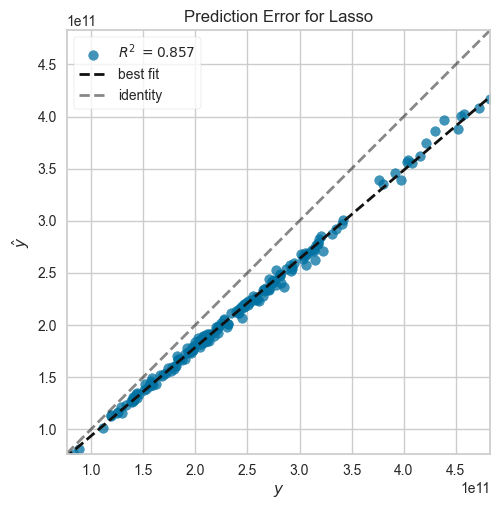

<AxesSubplot:title={'center':'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [20]:
visualizer = PredictionError(Ls)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


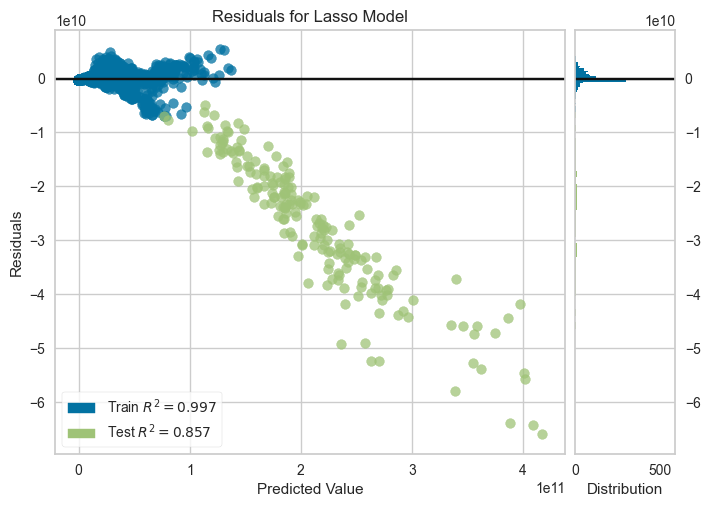

<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [21]:
visualizer = ResidualsPlot(Ls)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [22]:
from sklearn.tree import DecisionTreeRegressor
mytre=DecisionTreeRegressor()
mytre.fit(X, X_y)
ypred=mytre.predict(test_data)
mytre.score(test_data, test_y)

-1.7146278550242564

In [23]:
from sklearn.metrics import mean_absolute_error
ypred = mytre.predict(test_data)
mean_absolute_error(test_y, ypred)

107514691379.55719

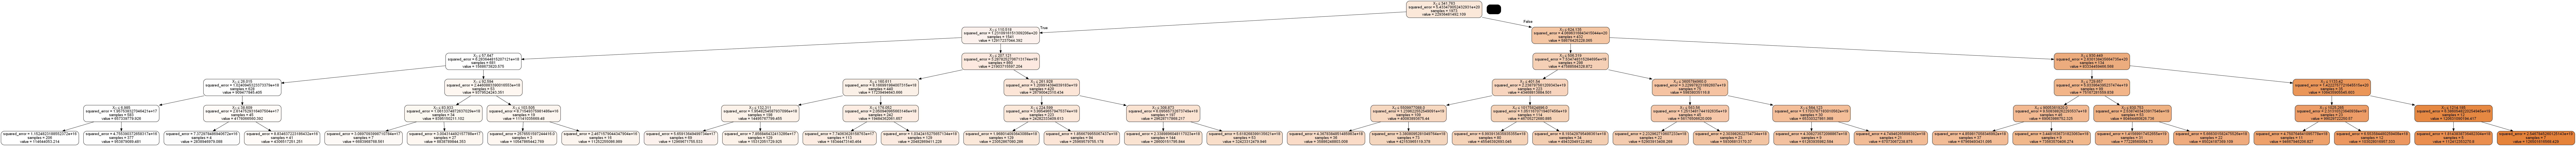

In [24]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4
# https://graphviz.org/download/
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz/bin/'

dot_data = StringIO()

model=DecisionTreeRegressor(max_depth=5) # to fit in image, do not change max_depth for better accuracy
model.fit(X, X_y)
# model.score(test_data, test_y)
# estimator = model.estimators_[5]
export_graphviz(model, out_file=dot_data, 
                filled=True, rounded=True,
                special_characters=True
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png("tree.png")

Image(graph.create_png())

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


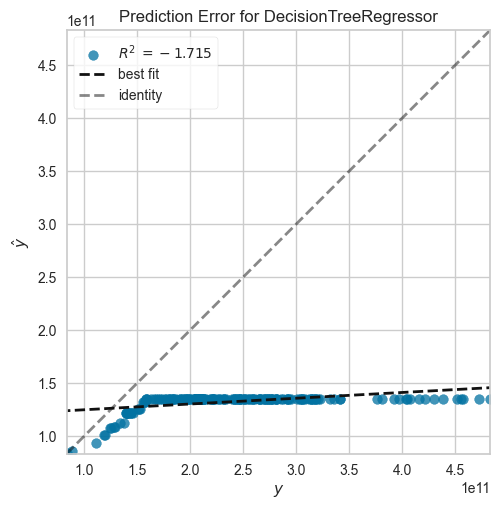

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [25]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(mytre)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


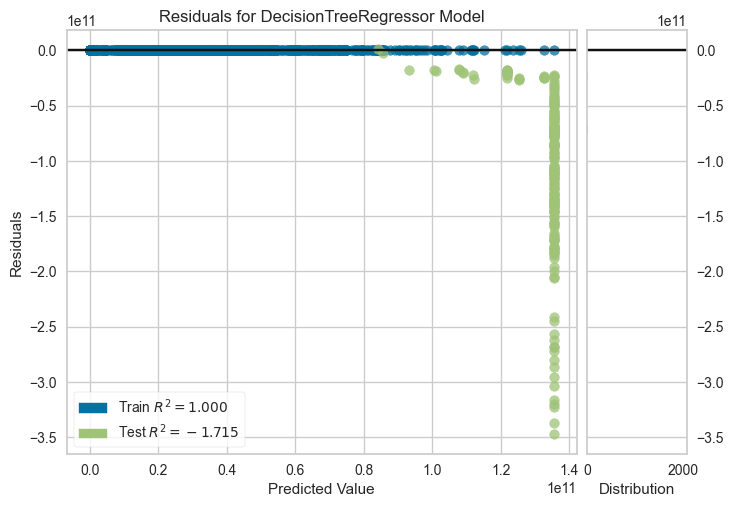

<AxesSubplot:title={'center':'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [26]:
visualizer = ResidualsPlot(mytre)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [27]:
from sklearn.ensemble import RandomForestRegressor

randfor = RandomForestRegressor()
randfor.fit(X, X_y)
ypred = randfor.predict(test_data)
randfor.score(test_data, test_y)

-1.8177323123779403

In [28]:
from sklearn.metrics import mean_absolute_error
ypred = randfor.predict(test_data)
mean_absolute_error(test_y, ypred)

110157875982.48366

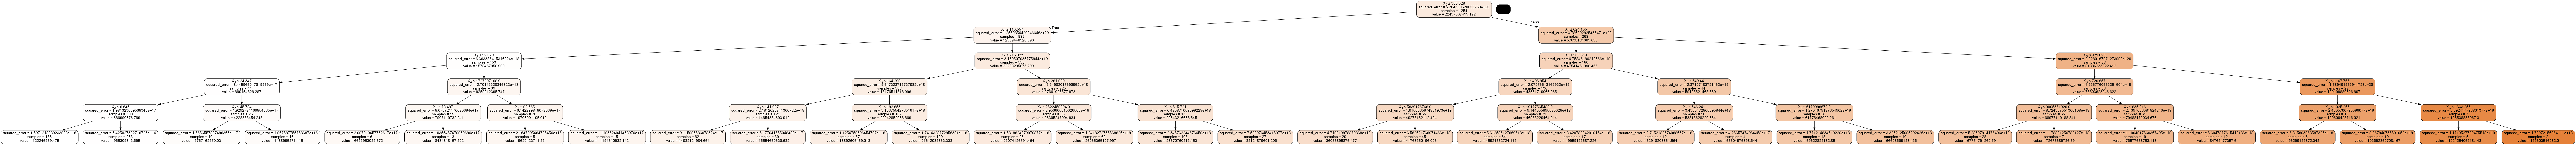

In [29]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4
# https://graphviz.org/download/
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz/bin/'

dot_data = StringIO()

model = RandomForestRegressor(max_depth=5) # to fit in image, do not change max_depth for better accuracy
model.fit(X, X_y)
estimator = model.estimators_[5]
export_graphviz(estimator, out_file=dot_data, 
                filled=True, rounded=True,
                special_characters=True
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png("tree.png")

Image(graph.create_png())

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


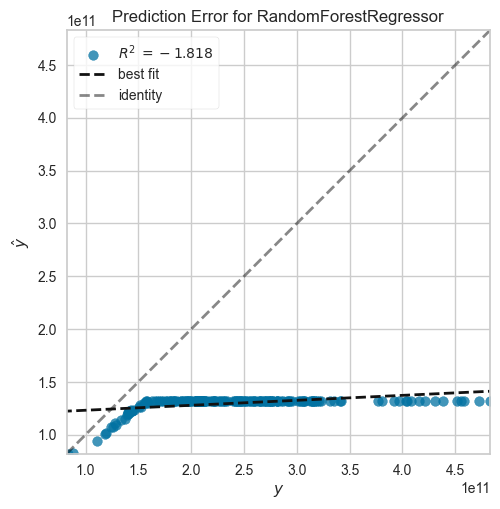

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [30]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(randfor)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


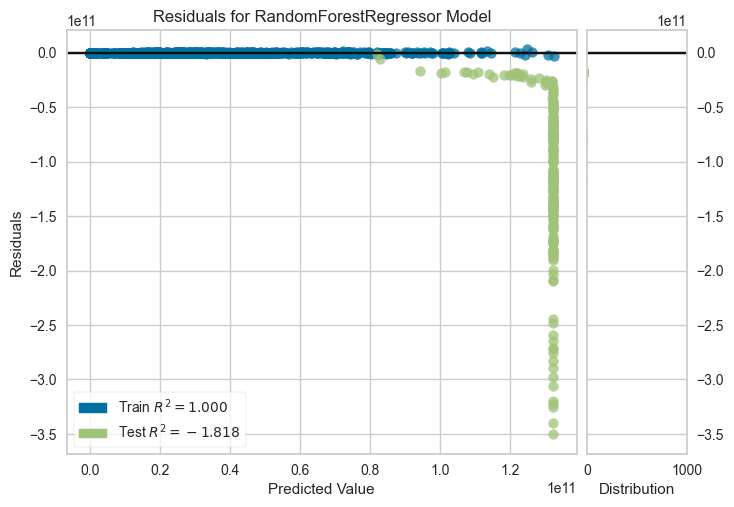

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [31]:
visualizer = ResidualsPlot(randfor)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [32]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X, X_y)
ypred = svr.predict(test_data)
svr.score(test_data, test_y)

-7.638429799951659

In [33]:
from sklearn.metrics import mean_absolute_error
ypred = svr.predict(test_data)
mean_absolute_error(test_y, ypred)

220745598349.46674

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


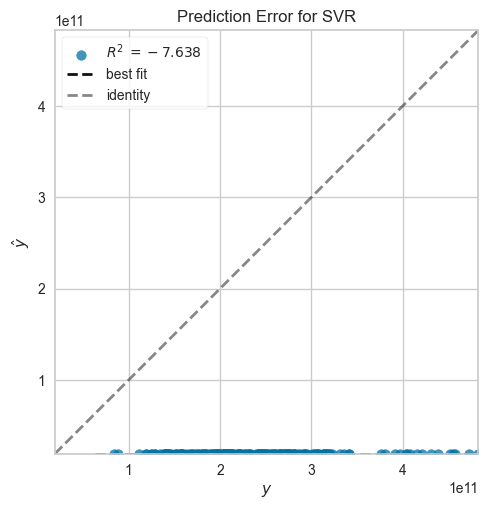

<AxesSubplot:title={'center':'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [34]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(svr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


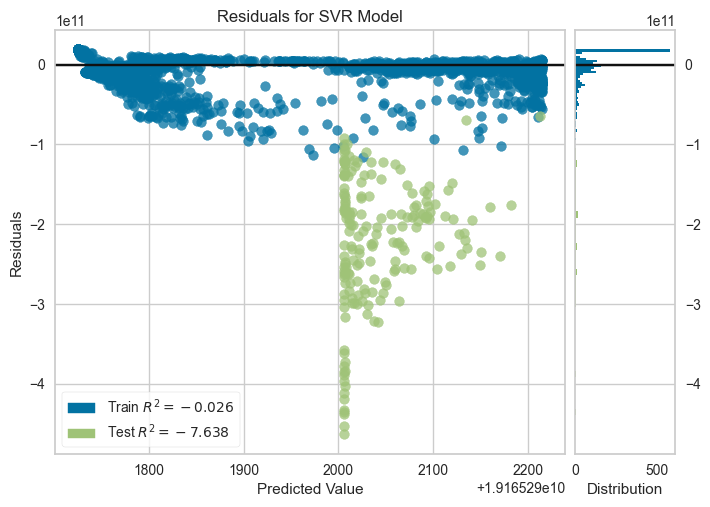

<AxesSubplot:title={'center':'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [35]:
visualizer = ResidualsPlot(svr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X)
X_scale = scale.transform(X)

test_scale = scale.transform(test_data)

st_vr = SVR()
st_vr.fit(X_scale, X_y)
st_vr.score(test_scale, test_y)

-7.638429786801952

In [37]:
from sklearn.metrics import mean_absolute_error
ypred = st_vr.predict(test_scale)
mean_absolute_error(test_y, ypred)

220745598162.0314

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


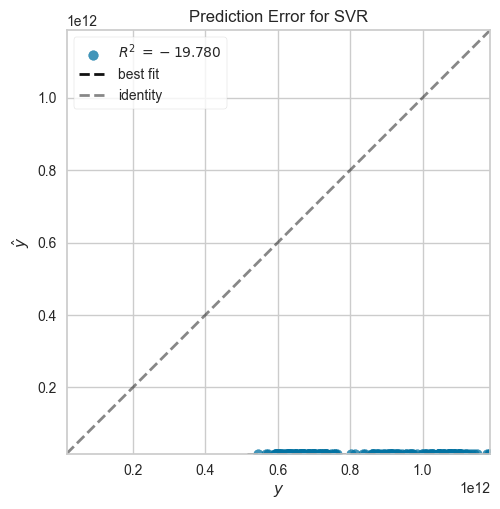

<AxesSubplot:title={'center':'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [140]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(st_vr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


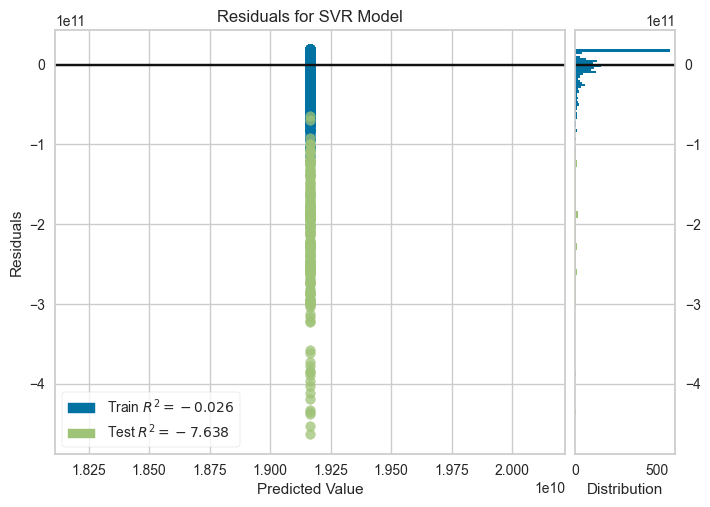

<AxesSubplot:title={'center':'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [38]:
visualizer = ResidualsPlot(st_vr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [39]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR()
lsvr.fit(X, X_y)
ypred = lsvr.predict(test_data)
lsvr.score(test_data, test_y)

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


-1.5394687883116855

In [40]:
from sklearn.metrics import mean_absolute_error
ypred = lsvr.predict(test_data)
mean_absolute_error(test_y, ypred)

109761869033.82921

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(


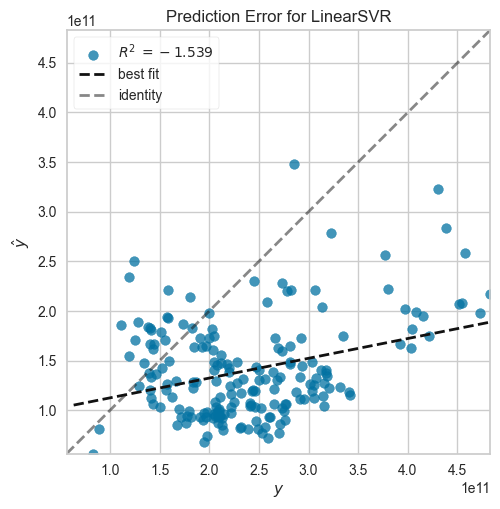

<AxesSubplot:title={'center':'Prediction Error for LinearSVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [41]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(lsvr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(


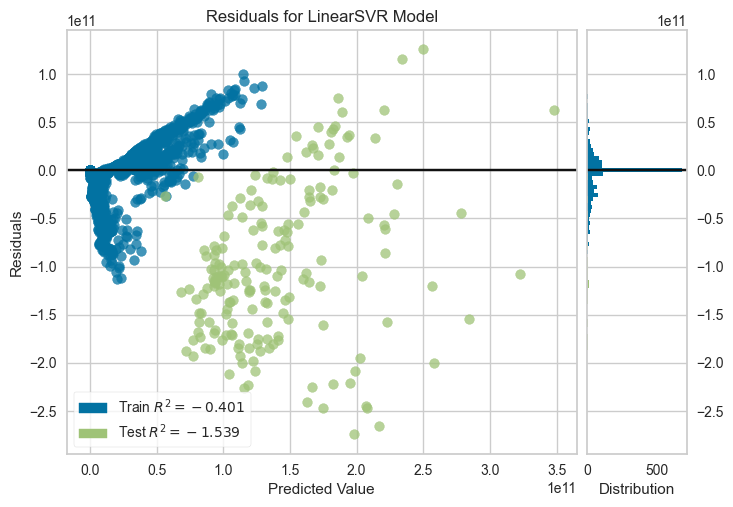

<AxesSubplot:title={'center':'Residuals for LinearSVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [42]:
visualizer = ResidualsPlot(lsvr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(X)
X_scale = scale.transform(X)

test_scale = scale.transform(test_data)

st_lvr = LinearSVR()
st_lvr.fit(X_scale, X_y)
st_lvr.score(test_scale, test_y)

-9.022354862412636

In [44]:
from sklearn.metrics import mean_absolute_error
ypred = st_lvr.predict(test_data)
mean_absolute_error(test_y, ypred)

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(


239910888419.15726

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(


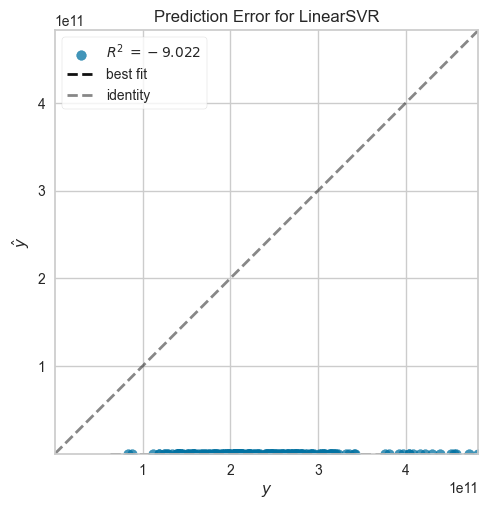

<AxesSubplot:title={'center':'Prediction Error for LinearSVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [45]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visualizer = PredictionError(st_lvr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)  
visualizer.poof()

C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(
C:\Users\vince\Desktop\coinmeup\venv\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearSVR was fitted without feature names
  warnings.warn(


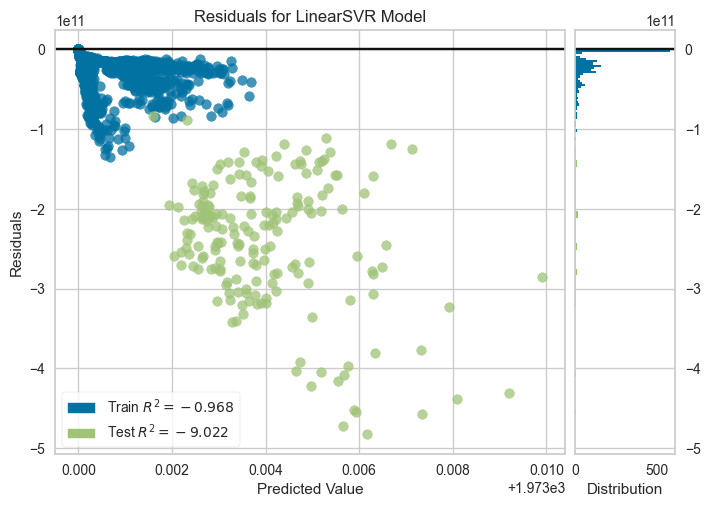

<AxesSubplot:title={'center':'Residuals for LinearSVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [46]:
visualizer = ResidualsPlot(st_lvr)
visualizer.fit(X, X_y)  
visualizer.score(test_data, test_y)
visualizer.poof()